In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
from scipy.stats import pearsonr
import scipy.stats as stats
from scipy.stats import chi2_contingency

In [33]:
# Cargar desde una URL
df = pd.read_csv('https://raw.githubusercontent.com/dipalira/Melbourne-Housing-Data-Kaggle/master/Data/Melbourne_housing_FULL.csv')
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [34]:
df.describe

<bound method NDFrame.describe of            Suburb             Address  Rooms Type      Price Method  \
0      Abbotsford       68 Studley St      2    h        NaN     SS   
1      Abbotsford        85 Turner St      2    h  1480000.0      S   
2      Abbotsford     25 Bloomburg St      2    h  1035000.0      S   
3      Abbotsford  18/659 Victoria St      3    u        NaN     VB   
4      Abbotsford        5 Charles St      3    h  1465000.0     SP   
...           ...                 ...    ...  ...        ...    ...   
34852  Yarraville         13 Burns St      4    h  1480000.0     PI   
34853  Yarraville       29A Murray St      2    h   888000.0     SP   
34854  Yarraville      147A Severn St      2    t   705000.0      S   
34855  Yarraville    12/37 Stephen St      3    h  1140000.0     SP   
34856  Yarraville    3 Tarrengower St      2    h  1020000.0     PI   

             SellerG        Date  Distance  Postcode  ...  Bathroom  Car  \
0             Jellis   3/09/2016     

In [35]:
df.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [36]:

# Revisar el número total de filas y los valores nulos en la columna 'Price'
print(f"Total de filas: {df.shape[0]}")
print(f"Valores nulos en la columna 'Price': {df['Price'].isnull().sum()}")

Total de filas: 34857
Valores nulos en la columna 'Price': 7610


In [37]:
# Eliminar filas con valores nulos en la columna 'Price'
df_cleaned = df.dropna(subset=['Price'])

# Convertir la columna 'Price' a tipo entero
df_cleaned['Price'] = df_cleaned['Price'].astype(int)

# Verificar cuántas filas se eliminaron
rows_dropped = df.shape[0] - df_cleaned.shape[0]
percentage_dropped = (rows_dropped / df.shape[0]) * 100

print(f"Filas eliminadas: {rows_dropped}")
print(f"Porcentaje de datos eliminados: {percentage_dropped:.2f}%")

Filas eliminadas: 7610
Porcentaje de datos eliminados: 21.83%


C:\Users\danny\AppData\Local\Temp\ipykernel_13396\2885730075.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Price'] = df_cleaned['Price'].astype(int)


In [38]:
df_clean = df.dropna(subset=['Rooms', 'Price', 'Distance', 'Landsize'])

In [39]:
# Revisar la distribución de los tipos de propiedad
type_counts = df['Type'].value_counts()

# Calcular el porcentaje de la propiedad más común
most_common_type = type_counts.idxmax()
percentage_most_common = (type_counts.max() / df.shape[0]) * 100

print(f"El tipo de propiedad más común es: {most_common_type}")
print(f"Representa el {percentage_most_common:.2f}% del total de propiedades.")


El tipo de propiedad más común es: h
Representa el 68.80% del total de propiedades.


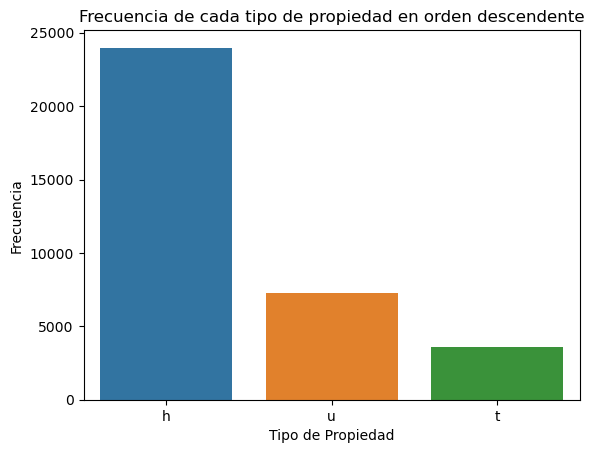

In [40]:
# Crear el barplot (gráfico de barras) en orden descendente
sns.barplot(x=type_counts.index, y=type_counts.values)

# Etiquetas y título
plt.xlabel('Tipo de Propiedad')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de cada tipo de propiedad en orden descendente')

# Mostrar el gráfico
plt.show()

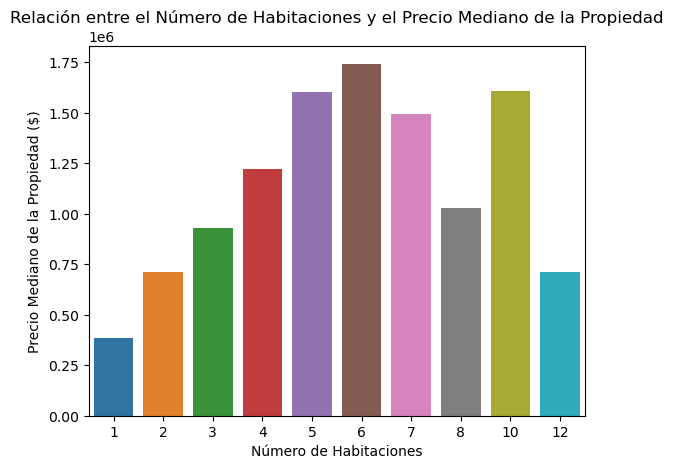

In [41]:

# Calcular el precio mediano de la propiedad agrupado por número de habitaciones
median_price_by_rooms = df_clean.groupby('Rooms')['Price'].median().reset_index()

# Crear el gráfico de barras
sns.barplot(x='Rooms', y='Price', data=median_price_by_rooms)

# Etiquetas y título
plt.xlabel('Número de Habitaciones')
plt.ylabel('Precio Mediano de la Propiedad ($)')
plt.title('Relación entre el Número de Habitaciones y el Precio Mediano de la Propiedad')

# Mostrar el gráfico
plt.show()

In [42]:
# Calcular el coeficiente de correlación de Spearman entre 'Rooms' y 'Price'
corr, p_value = spearmanr(df_clean['Rooms'], df_clean['Price'])

print(f"Coeficiente de correlación de Spearman: {corr:.4f}")

Coeficiente de correlación de Spearman: 0.4707


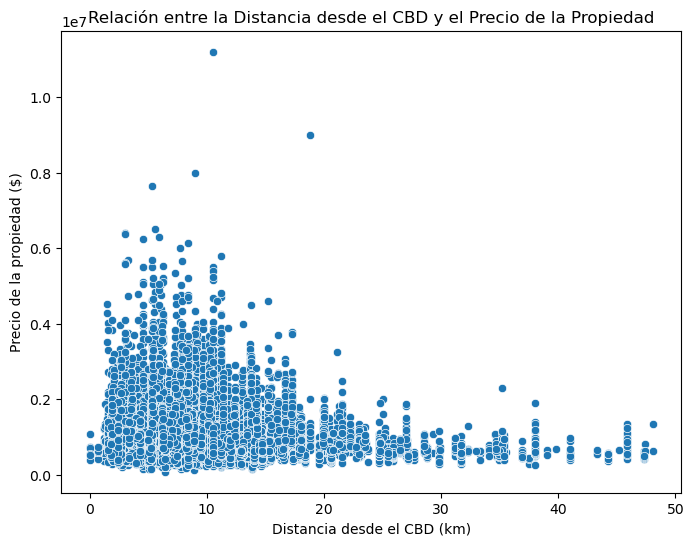

Coeficiente de correlación de Pearson: -0.2226


In [43]:
# Crear el scatter plot para visualizar la relación
plt.figure(figsize=(8,6))
sns.scatterplot(x='Distance', y='Price', data=df_clean)
plt.xlabel('Distancia desde el CBD (km)')
plt.ylabel('Precio de la propiedad ($)')
plt.title('Relación entre la Distancia desde el CBD y el Precio de la Propiedad')
plt.show()

# Calcular el coeficiente de correlación de Pearson entre 'Distance' y 'Price'
corr, p_value = pearsonr(df_clean['Distance'], df_clean['Price'])

print(f"Coeficiente de correlación de Pearson: {corr:.4f}")

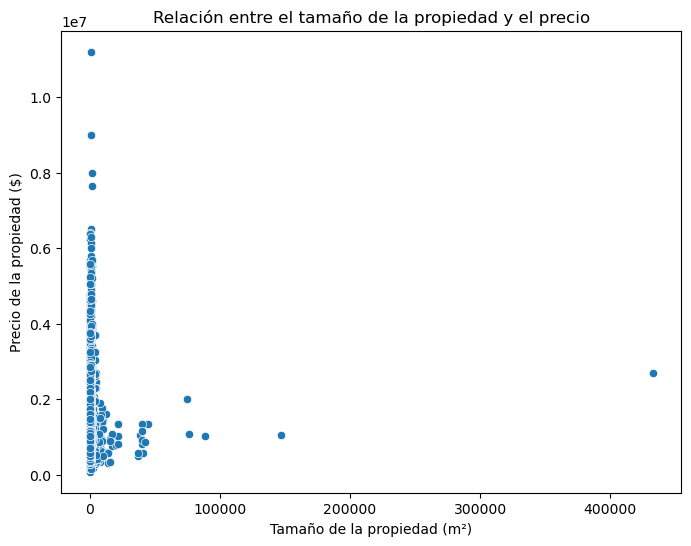

Coeficiente de correlación de Pearson: 0.0327


In [44]:
# Crear el scatter plot para visualizar la relación
plt.figure(figsize=(8,6))
sns.scatterplot(x='Landsize', y='Price', data=df_clean)
plt.xlabel('Tamaño de la propiedad (m²)')
plt.ylabel('Precio de la propiedad ($)')
plt.title('Relación entre el tamaño de la propiedad y el precio')
plt.show()

# Calcular el coeficiente de correlación de Pearson entre 'Landsize' y 'Price'
corr, p_value = pearsonr(df_clean['Landsize'], df_clean['Price'])

print(f"Coeficiente de correlación de Pearson: {corr:.4f}")

C:\Users\danny\AppData\Local\Temp\ipykernel_13396\3363220245.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Landsize_Quantile'] = pd.qcut(df_clean['Landsize'], q=7)


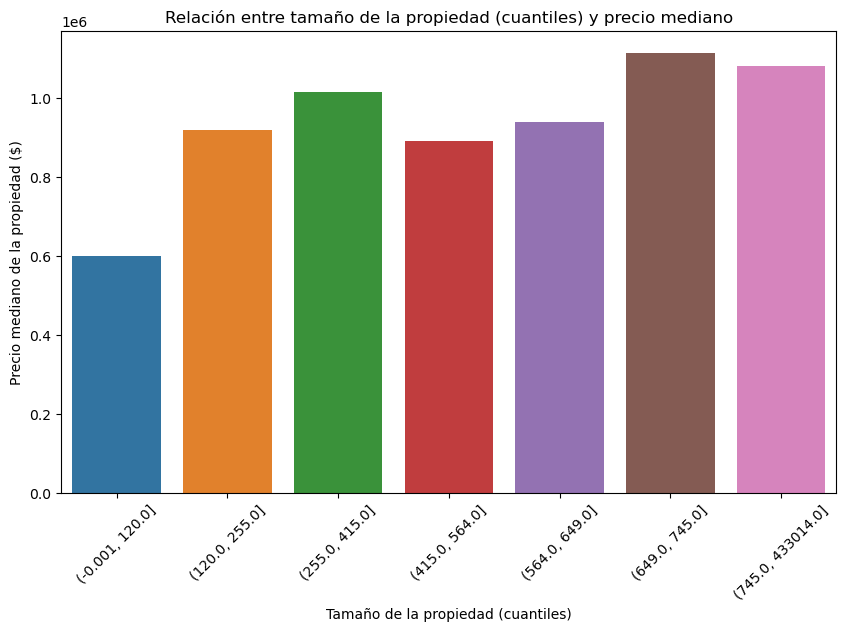

In [45]:
# Crear categorías basadas en cuantiles para 'Landsize'
df_clean['Landsize_Quantile'] = pd.qcut(df_clean['Landsize'], q=7)

# Calcular el precio mediano por cada grupo de tamaño de terreno
median_price_by_landsize = df_clean.groupby('Landsize_Quantile')['Price'].median().reset_index()

# Crear un gráfico de barras para mostrar la relación entre el tamaño de la propiedad (cuantiles) y el precio mediano
plt.figure(figsize=(10,6))
sns.barplot(x='Landsize_Quantile', y='Price', data=median_price_by_landsize)
plt.xticks(rotation=45)
plt.xlabel('Tamaño de la propiedad (cuantiles)')
plt.ylabel('Precio mediano de la propiedad ($)')
plt.title('Relación entre tamaño de la propiedad (cuantiles) y precio mediano')
plt.show()

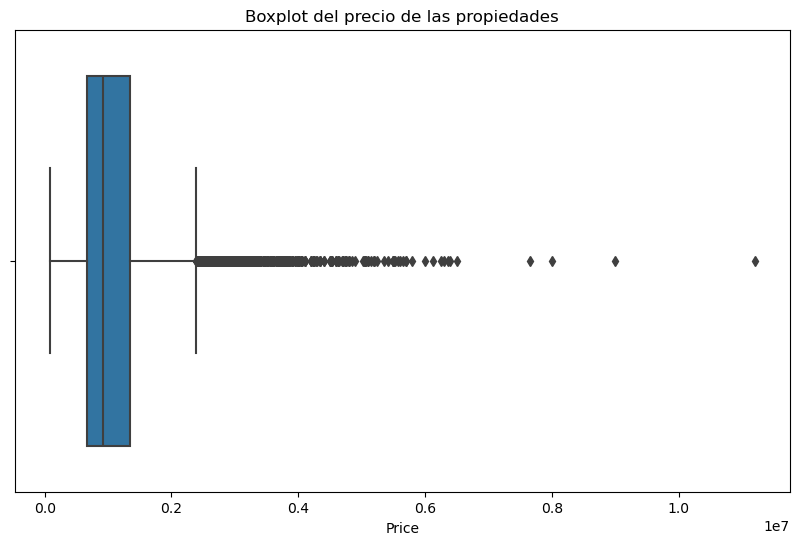

Porcentaje de propiedades identificadas como outliers: 4.49%


In [46]:
# Crear un box plot para visualizar los outliers
plt.figure(figsize=(10,6))
sns.boxplot(x=df_clean['Price'])
plt.title('Boxplot del precio de las propiedades')
plt.show()

# Calcular los cuartiles y el IQR
Q1 = df_clean['Price'].quantile(0.25)  # Primer cuartil (Q1)
Q3 = df_clean['Price'].quantile(0.75)  # Tercer cuartil (Q3)
IQR = Q3 - Q1                          # Rango intercuartil (IQR)

# Definir los límites inferior y superior usando el umbral de 1.5 IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar los outliers
outliers = df_clean[(df_clean['Price'] < lower_bound) | (df_clean['Price'] > upper_bound)]

# Crear un nuevo DataFrame sin outliers
df_without_outliers = df_clean[(df_clean['Price'] >= lower_bound) & (df_clean['Price'] <= upper_bound)]

# Calcular el porcentaje de propiedades identificadas como outliers
percentage_outliers = (len(outliers) / len(df_clean)) * 100

print(f"Porcentaje de propiedades identificadas como outliers: {percentage_outliers:.2f}%")

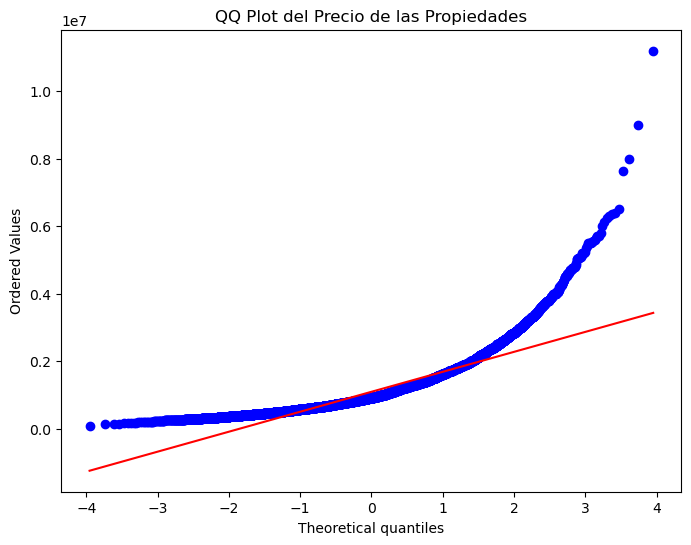

Skewness (Sesgo) de los precios: 2.44
Kurtosis (Curtosis) de los precios: 12.51


In [47]:
# QQ plot para comparar con la distribución normal
plt.figure(figsize=(8,6))
stats.probplot(df_clean['Price'], dist="norm", plot=plt)
plt.title('QQ Plot del Precio de las Propiedades')
plt.show()

# Calcular skewness (sesgo) y kurtosis (curtosis)
skewness = df_clean['Price'].skew()
kurtosis = df_clean['Price'].kurtosis()

print(f"Skewness (Sesgo) de los precios: {skewness:.2f}")
print(f"Kurtosis (Curtosis) de los precios: {kurtosis:.2f}")

In [48]:
# Realizar el test de Kolmogorov-Smirnov
# H0: La muestra sigue una distribución normal
# H1: La muestra no sigue una distribución normal
ks_statistic, p_value = stats.kstest(df_clean['Price'], 'norm', args=(df_clean['Price'].mean(), df_clean['Price'].std()))

# Resultados del test
print(f"Estadístico K-S: {ks_statistic:.4f}")
print(f"P-valor: {p_value:.4f}")

Estadístico K-S: 0.1273
P-valor: 0.0000


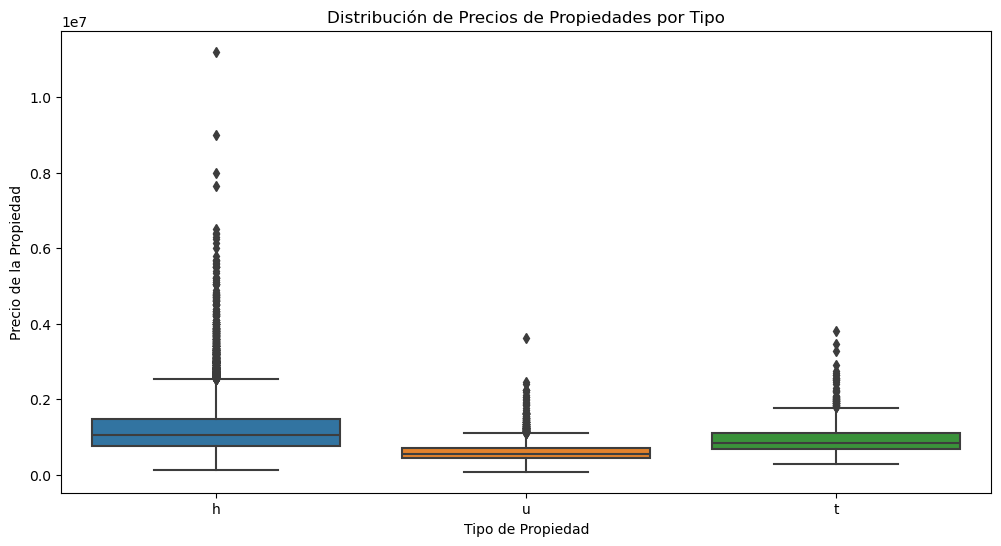

In [49]:
# Configurar el tamaño del gráfico
plt.figure(figsize=(12, 6))

# Crear el box plot
sns.boxplot(x='Type', y='Price', data=df_clean)

# Añadir título y etiquetas
plt.title('Distribución de Precios de Propiedades por Tipo')
plt.xlabel('Tipo de Propiedad')
plt.ylabel('Precio de la Propiedad')

# Mostrar el gráfico
plt.show()

In [50]:
# Calcular la mediana de precios por región
median_prices_by_region = df_clean.groupby('Regionname')['Price'].median().sort_values()

# Mostrar las medianas
print(median_prices_by_region)

Regionname
Western Victoria               415000.0
Northern Victoria              570000.0
Eastern Victoria               670000.0
Western Metropolitan           790000.0
Northern Metropolitan          801000.0
South-Eastern Metropolitan     860000.0
Eastern Metropolitan          1051000.0
Southern Metropolitan         1338000.0
Name: Price, dtype: float64


In [51]:
# Definir los límites para los rangos de precio
bins = [0, 400000, 600000, 800000, 1000000, float('inf')]
labels = ['<400k', '400k-600k', '600k-800k', '800k-1M', '>1M']

# Crear la nueva columna de rango de precios
df_clean['Price_Range'] = pd.cut(df_clean['Price'], bins=bins, labels=labels, right=False)

C:\Users\danny\AppData\Local\Temp\ipykernel_13396\2282030456.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Price_Range'] = pd.cut(df_clean['Price'], bins=bins, labels=labels, right=False)


In [52]:


# Crear una tabla de contingencia
contingency_table = pd.crosstab(df_clean['Regionname'], df_clean['Price_Range'])

# Realizar la prueba chi-cuadrado
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Mostrar resultados
print(f"Estadístico Chi-cuadrado: {chi2_stat}")
print(f"P-valor: {p_value}")
print(f"Grados de libertad: {dof}")

Estadístico Chi-cuadrado: 2974.129369162574
P-valor: 0.0
Grados de libertad: 28


In [53]:
# Calcular Cramér's V
cramers_v = np.sqrt(chi2_stat / (df_clean.shape[0] * (min(contingency_table.shape)-1)))

# Mostrar Cramér's V
print(f"Cramér's V: {cramers_v:.4f}")


Cramér's V: 0.2033


In [54]:
# Convertir la columna 'Date' a tipo datetime
df['Date'] = pd.to_datetime(df['Date'])

# Extraer el año de la columna 'Date'
df['Year'] = df['Date'].dt.year

# Calcular el precio medio por año
median_price_per_year = df.groupby('Year')['Price'].median()

# Obtener el año más temprano y el más reciente
earliest_year = median_price_per_year.index.min()
latest_year = median_price_per_year.index.max()

# Obtener los precios medios para estos años
median_price_earliest = median_price_per_year[earliest_year]
median_price_latest = median_price_per_year[latest_year]

# Calcular el porcentaje de cambio
percentage_change = ((median_price_latest - median_price_earliest) / median_price_earliest) * 100

print(f"Porcentaje de cambio entre {earliest_year} y {latest_year}: {percentage_change:.2f}%")

Porcentaje de cambio entre 2016 y 2018: -5.48%


C:\Users\danny\AppData\Local\Temp\ipykernel_13396\2093824439.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])


C:\Users\danny\AppData\Local\Temp\ipykernel_13396\322038117.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  houses['Month'] = houses['Date'].dt.month_name()


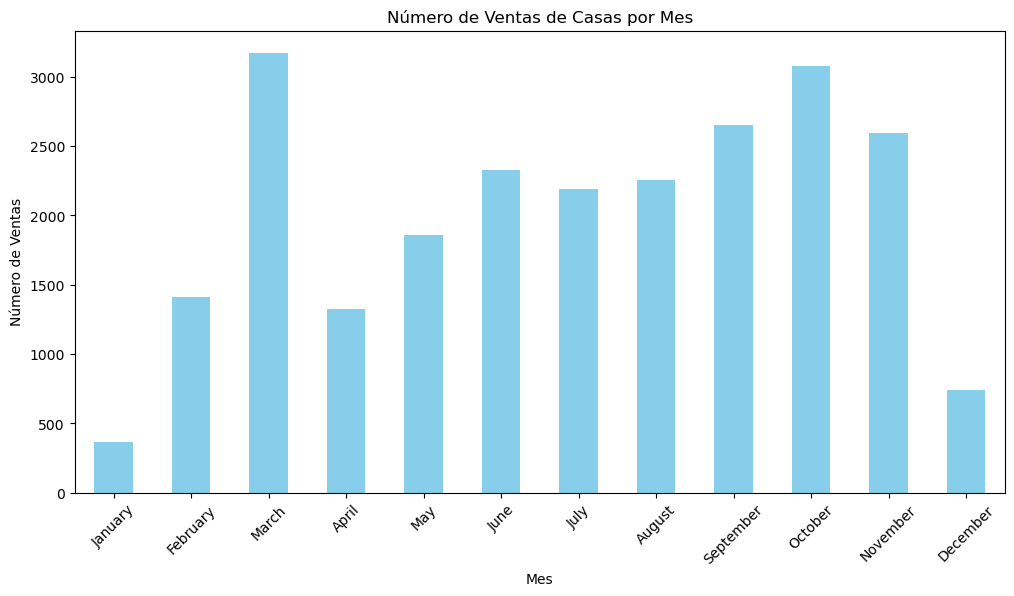

El mes con más ventas de casas es: March con 3176 ventas.


In [55]:
# Filtrar solo las casas
houses = df[df['Type'] == 'h']

# Extraer el mes de la columna 'Date'
houses['Month'] = houses['Date'].dt.month_name()

# Contar el número de ventas por mes
sales_by_month = houses['Month'].value_counts()

# Reordenar los meses para visualización
months_ordered = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 
                  'August', 'September', 'October', 'November', 'December']
sales_by_month = sales_by_month.reindex(months_ordered)

# Graficar el número de ventas por mes
plt.figure(figsize=(12, 6))
sales_by_month.plot(kind='bar', color='skyblue')
plt.title('Número de Ventas de Casas por Mes')
plt.xlabel('Mes')
plt.ylabel('Número de Ventas')
plt.xticks(rotation=45)
plt.show()

# Imprimir el mes con más ventas
most_sales_month = sales_by_month.idxmax()
most_sales_count = sales_by_month.max()

print(f"El mes con más ventas de casas es: {most_sales_month} con {most_sales_count} ventas.")